In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from NFW import NFW

In [2]:
'''THIS PART WORKS WITH NO_RT'''

전data290_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0290.txt")
dx290_noRT = 전data290_noRT[:,4]
dy290_noRT = 전data290_noRT[:,5]
dz290_noRT = 전data290_noRT[:,6]
r290_noRT = np.sqrt(dx290_noRT**2 + dy290_noRT**2 + dz290_noRT**2) # max: 11333.935323605565 pc, closest to 11340
rad_array290_noRT = np.arange(10, 11340, 10, dtype=np.int64) # unit: pc
density_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
i = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT > radius_value) & (r290_noRT < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile290_noRT[i] = how_many_particles / shell_volume
    i += 1
densityprof290_noRT = density_profile290_noRT / density_profile290_noRT[1]

In [3]:
# pick a halo mass, change the concentration

halo6 = NFW(1.903021e+08)
r_s6 = halo6.r_s()
c_vir6 = halo6.c_vir()
print('r_s =', r_s6)
print('c_vir =', c_vir6)

radius6 = np.arange(0.01, 11.34, 0.01) #unit: kpc

r_s = 0.8022370070865281
c_vir = 18.746949585500463


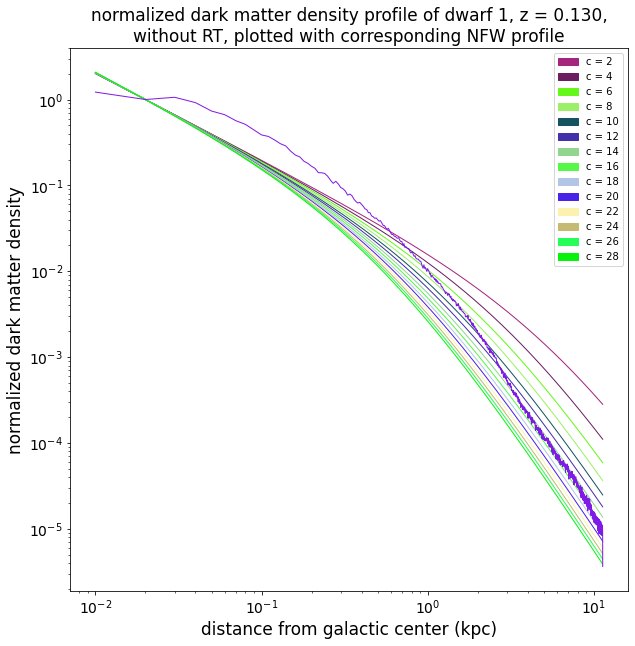

In [4]:
# best fit attempt 1, NORMALIZED

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in range(2, 30, 2):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile6 = halo6.rho(radius6, c_value)
    NFWdensityprof_noRT = density_profile6 / density_profile6[1]
    plt.plot(radius6, NFWdensityprof_noRT, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(c_value))
    all_the_legends.append(each_legend)

plt.plot(radius6, densityprof290_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 1, z = 0.130,\nwithout RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

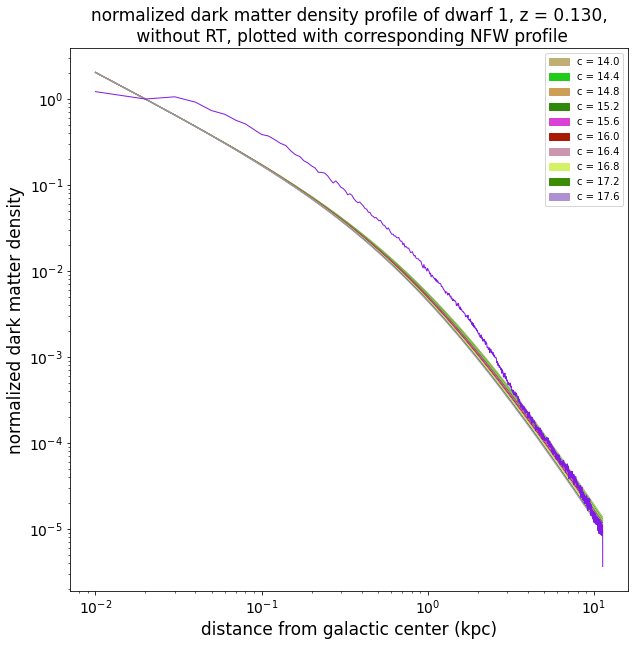

In [5]:
# best fit attempt 2, NORMALIZED

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in np.arange(14, 18, 0.4):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile6 = halo6.rho(radius6, c_value)
    NFWdensityprof_noRT = density_profile6 / density_profile6[1]
    plt.plot(radius6, NFWdensityprof_noRT, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(round(c_value, 1)))
    all_the_legends.append(each_legend)

plt.plot(radius6, densityprof290_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(10**0,10**1.05)
#plt.ylim(10**-5,10**-2)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 1, z = 0.130,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

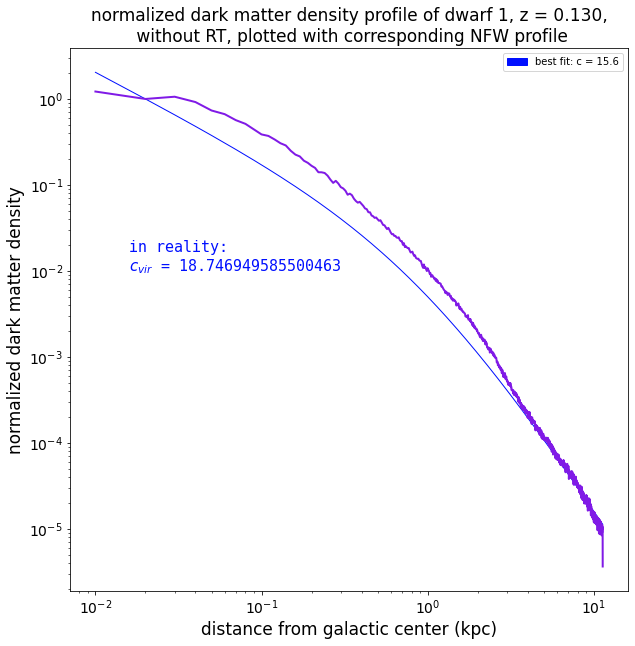

In [6]:
# plotting the best fit, NORMALIZED

plt.figure(figsize=(10,10))

density_profile6 = halo6.rho(radius6, c=15.6)
NFWdensityprof_noRT = density_profile6 / density_profile6[1]
plt.plot(radius6, NFWdensityprof_noRT, color='#000FFF', linewidth=1)
legend = mpatches.Patch(color='#000FFF', label='best fit: c = 15.6')

plt.plot(radius6, densityprof290_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=2)
    
plt.legend(handles=[legend], loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 1, z = 0.130,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)
plt.text(10**-1.8, 10**-2, '''in reality:\n$c_{vir}$ = 18.746949585500463''', \
         fontsize=15, color='#000FFF', fontfamily='monospace')

plt.show()

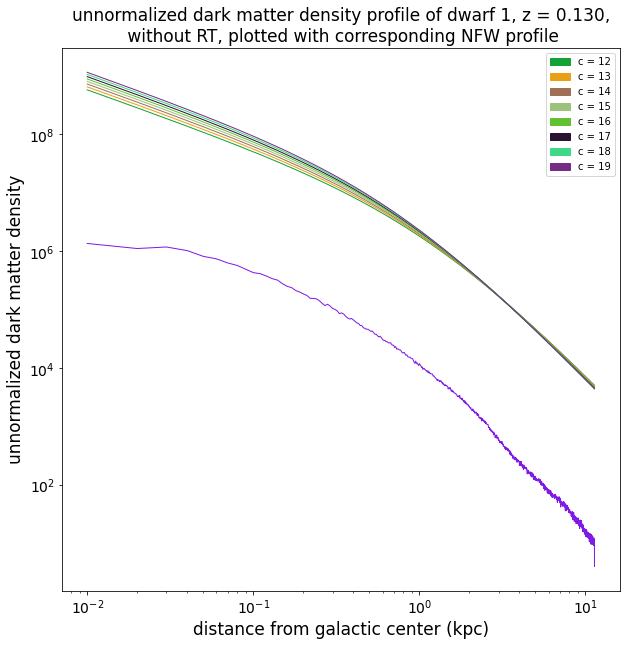

In [15]:
# plotting the best fit, UNNORMALIZED

dx290_noRT = 전data290_noRT[:,4] / 1000 # converting pc to kpc
dy290_noRT = 전data290_noRT[:,5] / 1000 # converting pc to kpc
dz290_noRT = 전data290_noRT[:,6] / 1000 # converting pc to kpc
r290_noRT = np.sqrt(dx290_noRT**2 + dy290_noRT**2 + dz290_noRT**2) # max: 11.333935323605565 pc, closest to 11.340 pc
rad_array290_noRT = np.arange(0.01, 11.34, 0.01) # unit: kpc
density_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
i = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT > radius_value) & (r290_noRT < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 0.01)**3 - radius_value**3)
    density_profile290_noRT[i] = how_many_particles / shell_volume
    i += 1

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in np.arange(12, 20, 1):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile6 = halo6.rho(radius6, c_value) # remember: radius6 = np.arange(0.01, 11.34, 0.01), unit: kpc
    plt.plot(radius6, density_profile6, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(round(c_value, 1)))
    all_the_legends.append(each_legend)

plt.plot(radius6, density_profile290_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('unnormalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('unnormalized dark matter density profile of dwarf 1, z = 0.130,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

In [8]:
'''THIS PART WORKS WITH RT'''

전data290 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0290.txt")
dx290 = 전data290[:,4]
dy290 = 전data290[:,5]
dz290 = 전data290[:,6]
r290 = np.sqrt(dx290**2 + dy290**2 + dz290**2) # max: 11415.825965662318, closest to 11420
rad_array290 = np.arange(10, 11420, 10, dtype=np.int64)
density_profile290 = np.zeros(np.size(rad_array290))
i = 0
for radius_value in rad_array290:
    particles = np.where((r290 > radius_value) & (r290 < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile290[i] = how_many_particles / shell_volume
    i += 1
densityprof290 = density_profile290 / density_profile290[1]

In [9]:
# pick a halo mass, change the concentration

halo7 = NFW(1.944113e+08)
r_s7 = halo7.r_s()
c_vir7 = halo7.c_vir()
print('r_s =', r_s7)
print('c_vir =', c_vir7)

radius7 = np.arange(0.01, 11.42, 0.01) #unit: kpc

r_s = 0.8092657818091061
c_vir = 18.716936511605343


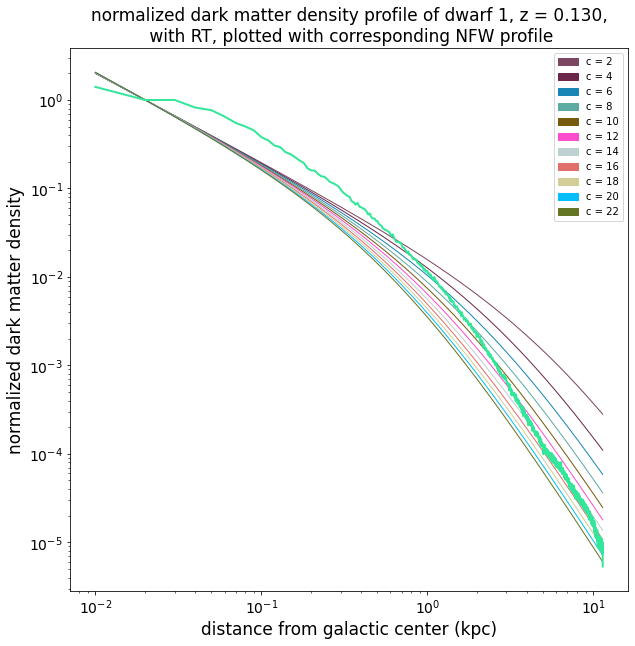

In [10]:
# best fit attempt 1, NORMALIZED

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in range(2, 24, 2):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile7 = halo7.rho(radius7, c_value)
    NFWdensityprof_noRT = density_profile7 / density_profile7[1]
    plt.plot(radius7, NFWdensityprof_noRT, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(c_value))
    all_the_legends.append(each_legend)

plt.plot(radius7, densityprof290, color=(0.2, 0.9, 0.6, 1), linewidth=2)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 1, z = 0.130,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

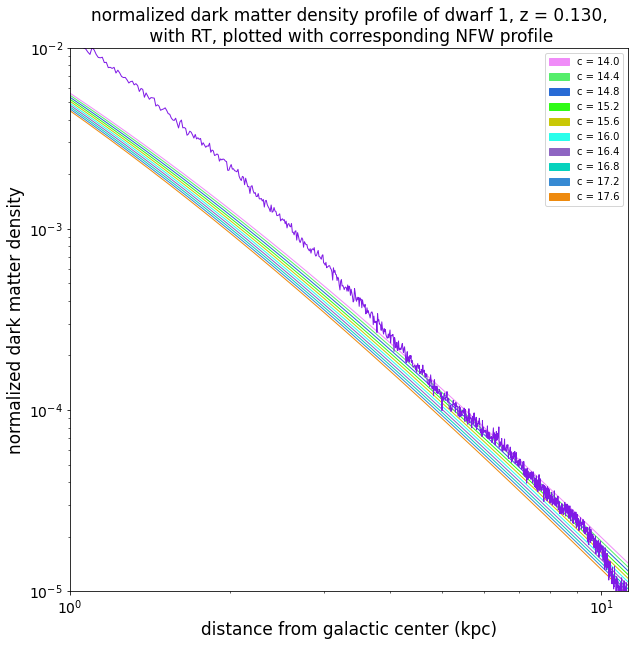

In [11]:
# best fit attempt 2, NORMALIZED

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in np.arange(14, 18, 0.4):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile7 = halo7.rho(radius7, c_value)
    NFWdensityprof = density_profile7 / density_profile7[1]
    plt.plot(radius7, NFWdensityprof, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(round(c_value, 1)))
    all_the_legends.append(each_legend)

plt.plot(radius7, densityprof290, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10**0,10**1.05)
plt.ylim(10**-5,10**-2)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 1, z = 0.130,\n with RT, plotted with corresponding NFW profile' ,\
          loc='center', fontsize=17)

plt.show()

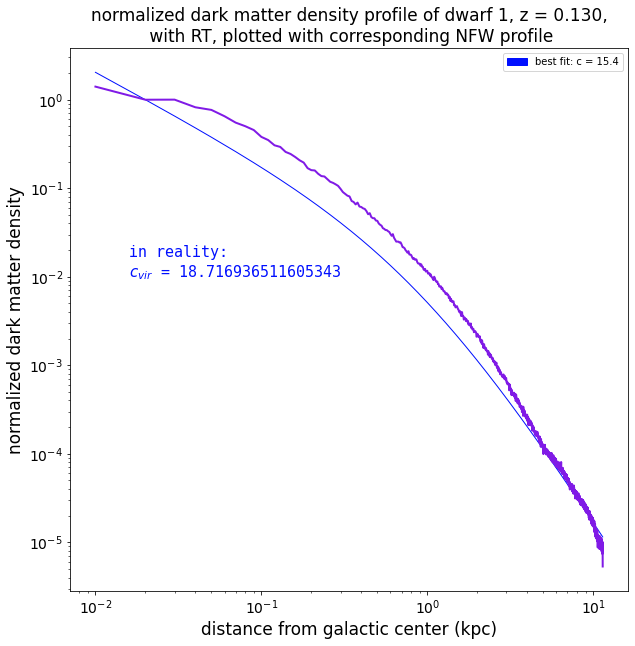

In [12]:
# plotting the best fit, NORMALIZED

plt.figure(figsize=(10,10))

density_profile7 = halo7.rho(radius7, c=15.4)
NFWdensityprof = density_profile7 / density_profile7[1]
plt.plot(radius7, NFWdensityprof, color='#000FFF', linewidth=1)
legend = mpatches.Patch(color='#000FFF', label='best fit: c = 15.4')

plt.plot(radius7, densityprof290, color=(0.5, 0.1, 0.9, 1), linewidth=2)
    
plt.legend(handles=[legend], loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 1, z = 0.130,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=17)
plt.text(10**-1.8, 10**-2, '''in reality:\n$c_{vir}$ = 18.716936511605343''', \
         fontsize=15, color='#000FFF', fontfamily='monospace')

plt.show()

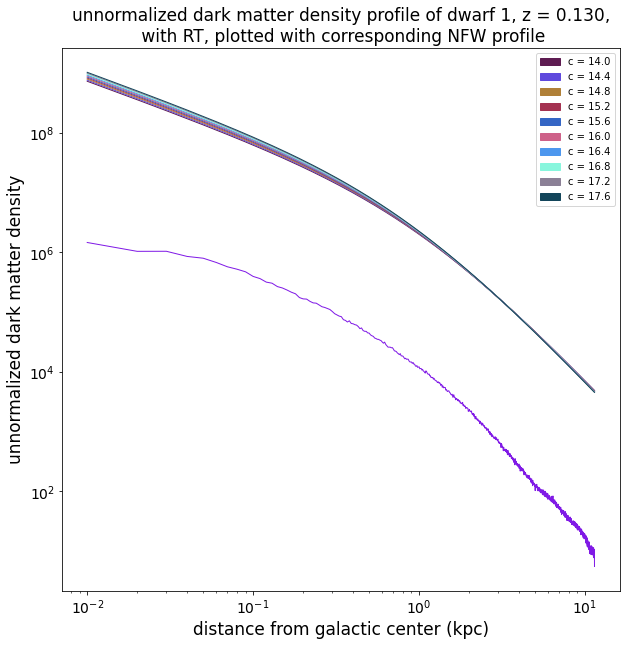

In [14]:
# plotting the best fit, UNNORMALIZED

dx290 = 전data290[:,4] / 1000 # converting pc to kpc
dy290 = 전data290[:,5] / 1000 # converting pc to kpc
dz290 = 전data290[:,6] / 1000 # converting pc to kpc
r290 = np.sqrt(dx290**2 + dy290**2 + dz290**2) # max: 11.415825965662318 kpc, closest to 11.42 kpc
rad_array290 = np.arange(0.01, 11.42, 0.01)
density_profile290 = np.zeros(np.size(rad_array290))
i = 0
for radius_value in rad_array290:
    particles = np.where((r290 > radius_value) & (r290 < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 0.01)**3 - radius_value**3)
    density_profile290[i] = how_many_particles / shell_volume
    i += 1
    
plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in np.arange(14, 18, 0.4):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile7 = halo7.rho(radius7, c_value)
    plt.plot(radius7, density_profile7, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(round(c_value, 1)))
    all_the_legends.append(each_legend)

plt.plot(radius7, density_profile290, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('unnormalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('unnormalized dark matter density profile of dwarf 1, z = 0.130,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()